# Problem statement:
This dataset has total 9 columns and 6603 rows. Our task is to analyze the dataset and predict the expected covid cases of by developing a Timeseries model.

In [2]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [3]:
covid = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
covid.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [4]:
covid.shape

(6603, 9)

In [5]:
covid.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [6]:
covid.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [7]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [8]:
covid.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

In [10]:
datewise = covid.groupby(['Date']).agg({'Total Cases':'sum','Total Recovered':'sum','Total Deaths':'sum'})

In [11]:
print("Basic Information")
print("Total number of Confirmed cases around the world", datewise["Total Cases"].iloc[-1])
print("Total number of Recoverd cases around the world", datewise["Total Recovered"].iloc[-1])
print("Total number of Deaths around the world", datewise["Total Deaths"].iloc[-1])
print("Total number of Active cases around the world", datewise["Total Cases"].iloc[-1]-datewise["Total Recovered"].iloc[-1]-datewise["Total Deaths"].iloc[-1])
print("Total number of Closed cases around the world", datewise["Total Recovered"].iloc[-1]+datewise["Total Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 4887403.0
Total number of Recoverd cases around the world 1904016.0
Total number of Deaths around the world 319950.0
Total number of Active cases around the world 2663437.0
Total number of Closed cases around the world 2223966.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

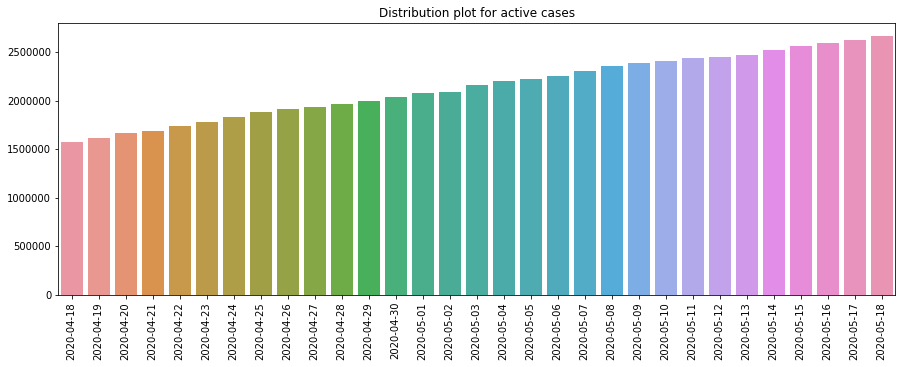

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Total Cases"]-datewise["Total Recovered"]-datewise["Total Deaths"])
plt.title("Distribution plot for active cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

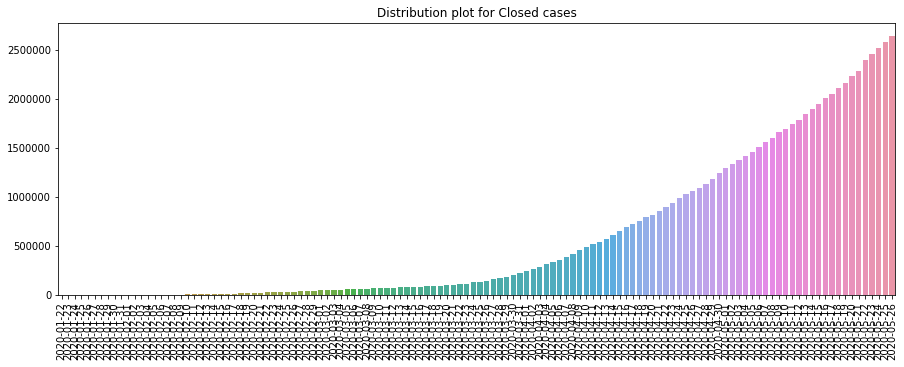

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'weekly progress of diffrent types of cases  ')

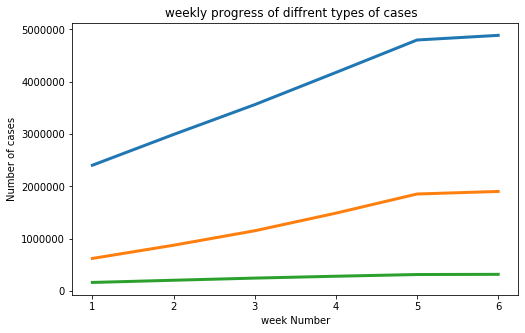

In [13]:
datewise["weekofyear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered =[]
weekwise_deaths = []
w = 1
for i in list(datewise['weekofyear'].unique()):
    weekwise_confirmed.append(datewise[datewise["weekofyear"]==i]["Total Cases"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["weekofyear"]==i]["Total Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["weekofyear"]==i]["Total Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("week Number")
plt.ylabel("Number of cases")
plt.title("weekly progress of diffrent types of cases  ")
    

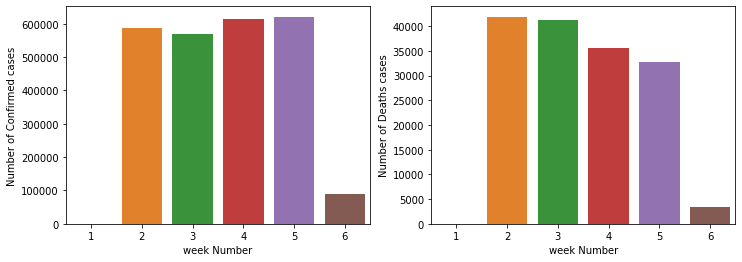

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x = week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x = week_num, y = pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week Number")
ax2.set_xlabel("week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Deaths cases")
plt.show()

Average increse in number of confirmed cases everyday 82495.0
Average increse in number of recovered cases everyday 42218.0
Average increse in number of deaths cases everyday 5159.0


(array([737532., 737536., 737540., 737544., 737546., 737550., 737554.,
        737558., 737562.]),
 <a list of 9 Text xticklabel objects>)

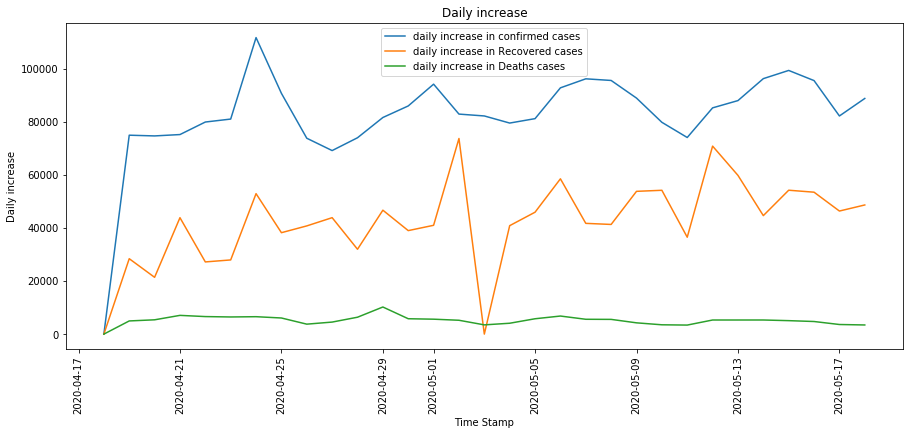

In [16]:
print("Average increse in number of confirmed cases everyday",np.round(datewise["Total Cases"].diff().fillna(0).mean()))
print("Average increse in number of recovered cases everyday",np.round(datewise["Total Recovered"].diff().fillna(0).mean()))
print("Average increse in number of deaths cases everyday",np.round(datewise["Total Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Total Cases"].diff().fillna(0),label="daily increase in confirmed cases")
plt.plot(datewise["Total Recovered"].diff().fillna(0),label="daily increase in Recovered cases")
plt.plot(datewise["Total Deaths"].diff().fillna(0),label="daily increase in Deaths cases")
plt.xlabel("Time Stamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation =90)

In [17]:
#Country wise analysis
#Calculating country wise mortality rate

countrywise = covid[covid["Date"] == covid["Date"].max()].groupby(["Country"]).agg({'Total Cases':'sum','Total Recovered':'sum','Total Deaths':'sum'}).sort_values(["Total Cases"],ascending=False)
countrywise["Mortality"] = (countrywise['Total Deaths']/countrywise['Total Recovered'])*100
countrywise["Recovered"] = (countrywise['Total Recovered']/countrywise['Total Cases'])*100

Text(0.5, 1.0, 'Top 15 Countries as per number of death cases ')

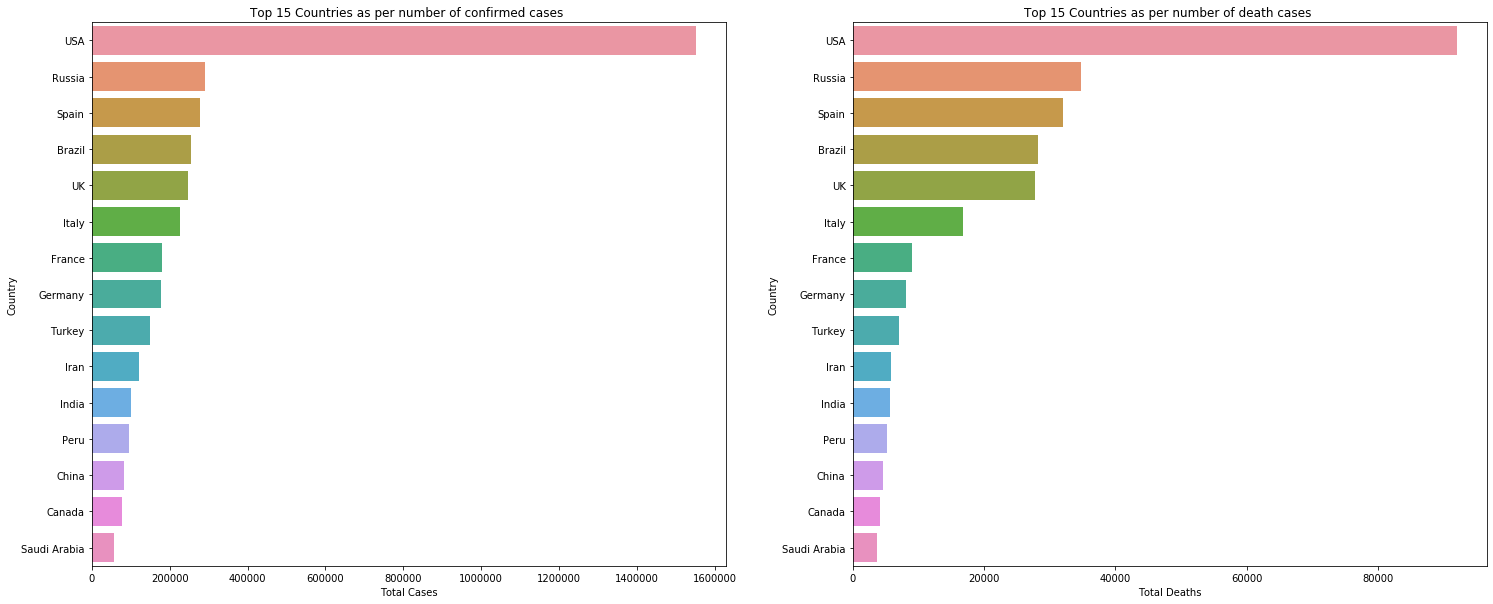

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(['Total Cases'],ascending=False).head(15)
top_15deaths = countrywise.sort_values(['Total Deaths'],ascending=False).head(15)
sns.barplot(x=top_15confirmed['Total Cases'],y =top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 Countries as per number of confirmed cases ")
sns.barplot(x=top_15deaths['Total Deaths'],y =top_15confirmed.index,ax=ax2)
ax2.set_title("Top 15 Countries as per number of death cases ")

In [19]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
model_scores=[]


# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the number of covid cases which can be increase exponetially. This scenario is a classic example of Time Series Analysis.

We are provided with 23688 rows of the labeled dataset tagged with the output column “cases” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

Linear Regression

SVR()

Holt()

In [20]:
lin_reg = LinearRegression(normalize = True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon = 0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Total Cases"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Total Cases"]).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [22]:
new_date = []
new_prediction_lr =[]
new_prediction_svm = []
for i in range (1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
    
pd.set_option("display.float_format",lambda x: '%.f'%x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)


,Dates,LR,SVR
0,2020-05-19,4937546,4928722
1,2020-05-20,5022571,5182603
2,2020-05-21,5107597,5470283
3,2020-05-22,5192623,5795029
4,2020-05-23,5277648,6160312
5,2020-05-24,5362674,6569814
6,2020-05-25,5447700,7027433
7,2020-05-26,5532725,7537292
8,2020-05-27,5617751,8103740
9,2020-05-28,5702777,8731362


# Splitting Data:
we split our data into a test set and train set. which helps to better train the model and test its performance. test_size=0.85 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us model_train and Valid 

In [23]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[int(datewise.shape[0]*0.85):]


In [24]:
holt = Holt(np.array(model_train["Total Cases"])).fit(smoothing_slope = 0.2)
y_pred = valid.copy()
y_pred['Holt'] = holt.forecast(len(valid))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [25]:
holt_new_date=[]
holt_new_predictions =[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days = i))
    holt_new_predictions.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Predictions "] = holt_new_predictions    
model_predictions.head(16)
    

,Dates,LR,SVR,Holts Linear Model Predictions
0,2020-05-19,4937546,4928722,4936291
1,2020-05-20,5022571,5182603,5021517
2,2020-05-21,5107597,5470283,5106743
3,2020-05-22,5192623,5795029,5191969
4,2020-05-23,5277648,6160312,5277195
5,2020-05-24,5362674,6569814,5362420
6,2020-05-25,5447700,7027433,5447646
7,2020-05-26,5532725,7537292,5532872
8,2020-05-27,5617751,8103740,5618098
9,2020-05-28,5702777,8731362,5703324


# Save the model using Pickle

In [26]:
# Save the model using pickle
import pickle

filename = "pickleholt_randomfile.pkl"
pickle.dump(holt, open(filename, 'wb'))


# Conclusion

Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the number of covid cases on time stamp.